In [1]:
import sys
sys.path.append('../')
import numpy as np
import importlib
import dataloader as u
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import sklearn.gaussian_process as gp
importlib.reload(u)
importlib.reload(gp)

<module 'sklearn.gaussian_process' from 'c:\\users\\kehua\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\sklearn\\gaussian_process\\__init__.py'>

In [3]:
datadict = u.load_covid_timeseries(smoothing=3, cases_cutoff=5)
cases = datadict['cases_raw']
deaths = datadict['deaths_raw']

In [4]:
z = deaths[2969]
z = z[z != 0]
init = [z[0]]
z1 = np.diff(z)
init.append(z1[0])
z2 = np.diff(z1)
z2 = (z2 - z2.mean()) / z2.std()

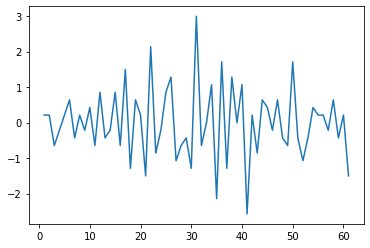

In [232]:
x = np.linspace(1, z2.shape[0], z2.shape[0])
y = z2
plt.plot(x, y)

In [6]:
X_train = []
y_train = []
X_test = []
y_test = []
validation_steps = 10

dat = z1

for i in range(dat.shape[0]):
    if i < dat.shape[0] - validation_steps:
        X_train.append(i)
        y_train.append(dat[i])
    else:
        X_test.append(i)
        y_test.append(dat[i])
        
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(-1, 1)
y_test = np.array(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56, 1) (56,) (10, 1) (10,)


In [226]:
kernel = gp.kernels.DotProduct()
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [227]:
print(y_pred)

[12.46526293 12.66495381 12.86464469 13.06433557 13.26402646 13.46371734
 13.66340822 13.8630991  14.06278999 14.26248087]


In [228]:
total = np.concatenate([y_train, y_pred])

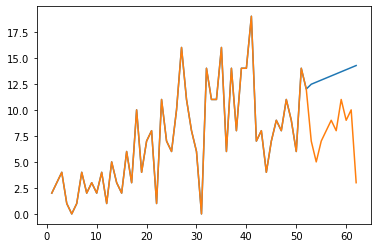

In [230]:
x = np.linspace(1, total.shape[0], total.shape[0])
y = total
plt.plot(x, y)

y = z1
plt.plot(x, y)

In [7]:
import scipy
from scipy.optimize import curve_fit

def func(x, a, b, c):
    #return a/(1 + np.exp(-b*(x - c)))
   return a*(1 + scipy.special.erf(b*(x - c)))

a, b = curve_fit(func, X_train, y_train)


ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [191]:
a

array([5.40261400e+03, 9.22745977e-02, 2.67502804e+01])

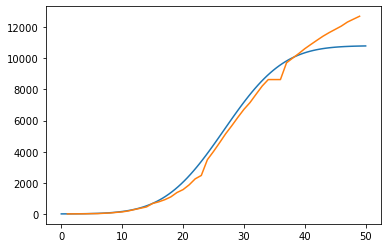

In [192]:
x = np.linspace(0, 50, 100)
y = func(x, a[0], a[1], a[2])
plt.plot(x, y)

x = np.linspace(1, z.shape[0], z.shape[0])
y = z
plt.plot(x, y)